In [275]:
import pickle
import requests
from bs4 import BeautifulSoup
import time
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time
import os
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import diagnostic_plots
import unicodedata

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import RidgeCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cross_validation import KFold
from sklearn.model_selection import learning_curve
%matplotlib inline

with open('all_top40.pkl', 'rb') as picklefile:
    df2 = pickle.load(picklefile)

In [128]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 598 entries, A.J. Cole to Zack Wheeler
Data columns (total 28 columns):
index                 598 non-null float64
Games_Played          598 non-null float64
Plate_Appearances     598 non-null float64
At_Bats               598 non-null float64
Runs                  598 non-null float64
Hits                  598 non-null float64
2B                    598 non-null float64
3B                    598 non-null float64
HR                    598 non-null float64
RBI                   598 non-null float64
BA                    598 non-null float64
OBP                   598 non-null float64
SLG                   598 non-null float64
OPS                   598 non-null float64
SB                    598 non-null float64
BB                    598 non-null float64
SO                    598 non-null float64
TB                    598 non-null float64
HBP                   598 non-null float64
SF                    598 non-null float64
dWAR                  5

In [129]:
df2.corr()

,index,Games_Played,Plate_Appearances,At_Bats,Runs,Hits,2B,3B,HR,RBI,...,SO,TB,HBP,SF,dWAR,Salary,Adj_Salary,Age,All_star_count,Total_games_played
index,1.000000,-0.029579,-0.041897,-0.038445,-0.053419,-0.035782,-0.035253,-0.103985,0.003601,-0.018127,...,-0.029851,-0.028481,-0.032617,-0.061803,-0.038788,-0.011494,-0.011494,-0.030561,-0.020871,-0.055165
Games_Played,-0.029579,1.000000,0.966533,0.966348,0.945866,0.957274,0.945161,0.708242,0.836525,0.926197,...,0.900404,0.952175,0.729182,0.876778,0.144867,0.339062,0.339062,0.167830,0.324173,0.893840
Plate_Appearances,-0.041897,0.966533,1.000000,0.999083,0.984366,0.992998,0.979235,0.732559,0.873336,0.962062,...,0.927729,0.989065,0.745406,0.910791,0.144760,0.382554,0.382554,0.125114,0.360350,0.871145
At_Bats,-0.038445,0.966348,0.999083,1.000000,0.980465,0.994153,0.978834,0.738166,0.866356,0.958739,...,0.923708,0.987941,0.738804,0.908226,0.152580,0.375059,0.375059,0.120760,0.352903,0.868288
Runs,-0.053419,0.945866,0.984366,0.980465,1.000000,0.981882,0.970256,0.746599,0.894875,0.960580,...,0.922909,0.987846,0.743754,0.894980,0.123565,0.395629,0.395629,0.111275,0.391329,0.846310
Hits,-0.035782,0.957274,0.992998,0.994153,0.981882,1.000000,0.983038,0.740811,0.857323,0.957042,...,0.897579,0.989519,0.727177,0.910996,0.146466,0.394382,0.394382,0.125174,0.382470,0.864405
2B,-0.035253,0.945161,0.979235,0.978834,0.970256,0.983038,1.000000,0.703093,0.861580,0.955683,...,0.890414,0.981260,0.715333,0.912854,0.144010,0.387460,0.387460,0.129351,0.380511,0.851928
3B,-0.103985,0.708242,0.732559,0.738166,0.746599,0.740811,0.703093,1.000000,0.516880,0.623654,...,0.678278,0.712525,0.530465,0.618251,0.204906,0.192429,0.192429,-0.027390,0.175984,0.581313
HR,0.003601,0.836525,0.873336,0.866356,0.894875,0.857323,0.861580,0.516880,1.000000,0.955563,...,0.898249,0.921175,0.684670,0.814999,-0.020993,0.385319,0.385319,0.087452,0.400565,0.729366
RBI,-0.018127,0.926197,0.962062,0.958739,0.960580,0.957042,0.955683,0.623654,0.955563,1.000000,...,0.917579,0.983901,0.717063,0.913883,0.059006,0.408617,0.408617,0.122398,0.406491,0.827398


In [130]:
df2

,index,Games_Played,Plate_Appearances,At_Bats,Runs,Hits,2B,3B,HR,RBI,...,HBP,SF,dWAR,Salary,Adj_Salary,Age,All_star_count,Total_games_played,Team,Pos
Player_Name,,,,,,,,,,,,,,,,,,,,,
A.J. Cole,0.0,7.000000,8.666667,7.666667,0.000000,0.666667,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,555300.0,0.081579,25,0.0,21,TOT,1
A.J. Ellis,1.0,78.571429,282.714286,239.428571,24.000000,56.285714,9.857143,0.428571,6.142857,28.142857,...,3.714286,2.142857,0.571429,1250000.0,0.183638,36,0.0,550,SDP,2
A.J. Pollock,3.0,87.333333,341.166667,310.666667,51.000000,89.000000,20.500000,4.000000,8.833333,33.166667,...,2.000000,2.000000,0.966667,7750000.0,1.138556,29,1.0,524,ARI,8
Aaron Altherr,5.0,51.250000,201.250000,178.000000,26.500000,43.250000,10.250000,2.250000,7.000000,27.250000,...,4.500000,0.750000,-0.075000,561000.0,0.082417,26,0.0,205,PHI,9
Aaron Hicks,7.0,91.600000,330.000000,289.400000,38.600000,67.000000,12.200000,1.400000,8.600000,32.200000,...,1.400000,2.600000,0.420000,2825000.0,0.415022,27,0.0,458,NYY,8
Aaron Judge,8.0,91.000000,386.500000,313.000000,69.000000,84.500000,13.000000,1.500000,28.000000,62.000000,...,3.000000,2.500000,0.050000,622300.0,0.091422,25,1.0,182,NYY,9
Aaron Loup,9.0,3.200000,0.200000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1812500.0,0.266275,29,0.0,16,TOR,1
Aaron Nola,10.0,18.666667,38.333333,33.666667,1.333333,2.333333,0.333333,0.000000,0.000000,0.666667,...,0.333333,0.000000,0.000000,573000.0,0.084180,24,0.0,56,PHI,1
Abraham Almonte,12.0,60.400000,189.800000,172.400000,23.000000,42.400000,10.800000,2.000000,2.800000,16.800000,...,0.600000,1.800000,0.060000,825000.0,0.121201,28,0.0,302,KCR,8


In [131]:
X=patsy.dmatrix('Pos',data=df2,return_type='dataframe')
X.head()

,Intercept,Pos[T.2],Pos[T.3],Pos[T.4],Pos[T.5],Pos[T.6],Pos[T.7],Pos[T.8],Pos[T.9],Pos[T.D]
Player_Name,,,,,,,,,,
A.J. Cole,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A.J. Ellis,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A.J. Pollock,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
Aaron Altherr,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
Aaron Hicks,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [132]:
df2=df2.join(X)

In [133]:
df2['Catcher'] = df2['Pos[T.2]']
df2['First_Base'] = df2['Pos[T.3]']
df2['Second_Base'] = df2['Pos[T.4]']
df2['Third_Base'] = df2['Pos[T.5]']
df2['Shortstop'] = df2['Pos[T.6]']
df2['Left_Field'] = df2['Pos[T.7]']
df2['Center_Field'] = df2['Pos[T.8]']
df2['Right_Field'] = df2['Pos[T.9]']
df2['DH'] = df2['Pos[T.D]']

df2 = df2.drop(['Pos[T.2]','Pos[T.3]','Pos[T.4]','Pos[T.5]','Pos[T.6]','Pos[T.7]','Pos[T.8]','Pos[T.9]','Pos[T.D]'],1)

df2

,index,Games_Played,Plate_Appearances,At_Bats,Runs,Hits,2B,3B,HR,RBI,...,Intercept,Catcher,First_Base,Second_Base,Third_Base,Shortstop,Left_Field,Center_Field,Right_Field,DH
Player_Name,,,,,,,,,,,,,,,,,,,,,
A.J. Cole,0.0,7.000000,8.666667,7.666667,0.000000,0.666667,0.000000,0.000000,0.000000,0.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A.J. Ellis,1.0,78.571429,282.714286,239.428571,24.000000,56.285714,9.857143,0.428571,6.142857,28.142857,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A.J. Pollock,3.0,87.333333,341.166667,310.666667,51.000000,89.000000,20.500000,4.000000,8.833333,33.166667,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
Aaron Altherr,5.0,51.250000,201.250000,178.000000,26.500000,43.250000,10.250000,2.250000,7.000000,27.250000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
Aaron Hicks,7.0,91.600000,330.000000,289.400000,38.600000,67.000000,12.200000,1.400000,8.600000,32.200000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
Aaron Judge,8.0,91.000000,386.500000,313.000000,69.000000,84.500000,13.000000,1.500000,28.000000,62.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
Aaron Loup,9.0,3.200000,0.200000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Aaron Nola,10.0,18.666667,38.333333,33.666667,1.333333,2.333333,0.333333,0.000000,0.000000,0.666667,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Abraham Almonte,12.0,60.400000,189.800000,172.400000,23.000000,42.400000,10.800000,2.000000,2.800000,16.800000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [134]:
batters_only = df2[df2['Pos'] != '1']

In [135]:
batters_only = batters_only.rename(index=str, columns={"2B": "Doubles", "3B": "Triples"})

In [136]:
batters_only.info()

<class 'pandas.core.frame.DataFrame'>
Index: 342 entries, A.J. Ellis to Yuli Gurriel
Data columns (total 38 columns):
index                 342 non-null float64
Games_Played          342 non-null float64
Plate_Appearances     342 non-null float64
At_Bats               342 non-null float64
Runs                  342 non-null float64
Hits                  342 non-null float64
Doubles               342 non-null float64
Triples               342 non-null float64
HR                    342 non-null float64
RBI                   342 non-null float64
BA                    342 non-null float64
OBP                   342 non-null float64
SLG                   342 non-null float64
OPS                   342 non-null float64
SB                    342 non-null float64
BB                    342 non-null float64
SO                    342 non-null float64
TB                    342 non-null float64
HBP                   342 non-null float64
SF                    342 non-null float64
dWAR                  

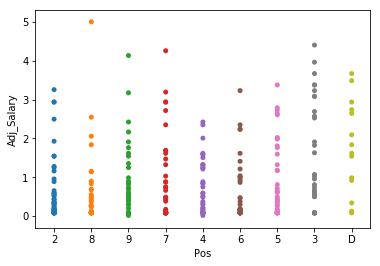

In [137]:
sns.stripplot(x="Pos", y="Adj_Salary", data=batters_only)

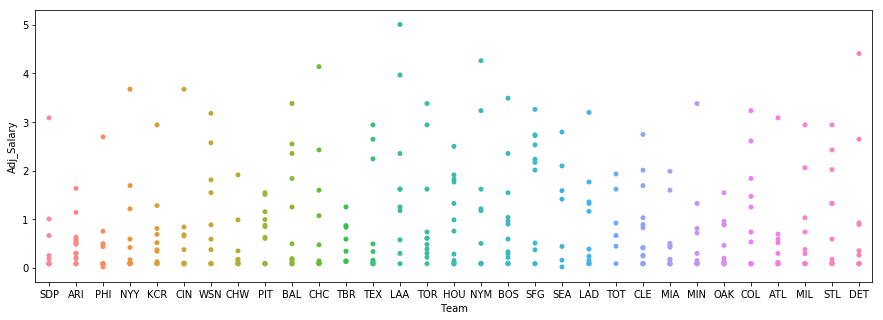

In [138]:
fig, ax = plt.subplots(figsize=(15,5))
sns.stripplot(x="Team", y="Adj_Salary", data=batters_only, ax=ax)

In [139]:
salary_df = batters_only.sort_values(by='Adj_Salary', ascending=False)
salary_df[:10]

,index,Games_Played,Plate_Appearances,At_Bats,Runs,Hits,Doubles,Triples,HR,RBI,...,Intercept,Catcher,First_Base,Second_Base,Third_Base,Shortstop,Left_Field,Center_Field,Right_Field,DH
Player_Name,,,,,,,,,,,,,,,,,,,,,
Mike Trout,613.0,132.142857,580.714286,485.571429,98.857143,148.571429,28.571429,5.714286,28.714286,81.285714,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
Miguel Cabrera,599.0,148.000000,634.428571,550.428571,90.000000,176.571429,35.285714,0.571429,30.714286,104.857143,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Yoenis Cespedes,829.0,131.333333,549.833333,503.166667,75.333333,138.000000,27.666667,4.000000,25.666667,82.500000,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
Jason Heyward,377.0,137.285714,554.142857,492.428571,69.000000,127.714286,24.428571,3.000000,13.857143,55.428571,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
Albert Pujols,34.0,145.285714,629.428571,571.142857,76.714286,152.571429,27.571429,0.142857,29.428571,98.285714,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Joey Votto,417.0,139.142857,610.142857,490.571429,85.000000,153.571429,33.000000,1.571429,23.857143,76.000000,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Giancarlo Stanton,312.0,126.571429,532.000000,459.714286,75.857143,123.857143,25.857143,1.285714,35.000000,87.571429,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
J.D. Martinez,342.0,110.285714,445.428571,404.000000,55.857143,115.000000,24.000000,1.857143,21.714286,68.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Chris Davis,169.0,132.857143,547.000000,477.571429,76.000000,117.142857,22.428571,0.285714,32.571429,82.285714,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [140]:
batters_only_df = batters_only[['Runs', 'Hits', 'Doubles', 'Triples', 'HR', 'RBI', 'BA', 'OBP', 'SLG',
                                'OPS', 'SB', 'TB', 'SF', 'Adj_Salary', 'Age', 'Total_games_played',
                                'dWAR','All_star_count','Catcher','First_Base','Second_Base','Third_Base',
                                'Shortstop','Left_Field','Center_Field','Right_Field','DH','Team']]

In [141]:
#sns.pairplot(batters_only_df, size=1.2, aspect=1.5)

/Users/brendenrossin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


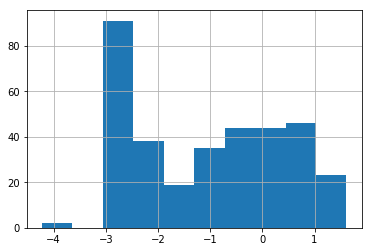

In [142]:
batters_only_df['log_salary'] = np.log(batters_only_df.Adj_Salary)

batters_only_df.log_salary.hist()

In [143]:
batters_only_df.loc[:,'rootASC'] = batters_only_df.loc[:,'All_star_count'] ** 0.5

/Users/brendenrossin/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:357: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/brendenrossin/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [144]:
batters_only_df.corr()

,Runs,Hits,Doubles,Triples,HR,RBI,BA,OBP,SLG,OPS,...,First_Base,Second_Base,Third_Base,Shortstop,Left_Field,Center_Field,Right_Field,DH,log_salary,rootASC
Runs,1.000000,0.956828,0.929733,0.550765,0.805194,0.912269,0.486039,0.518632,0.479635,0.535410,...,0.109978,0.043559,0.045325,0.017108,0.028614,0.011579,0.091815,0.082522,0.711225,0.676420
Hits,0.956828,1.000000,0.959450,0.537053,0.728095,0.903930,0.556096,0.493632,0.444773,0.501254,...,0.105534,0.059254,0.056981,0.065591,-0.013616,-0.031025,0.052767,0.080960,0.746776,0.663397
Doubles,0.929733,0.959450,1.000000,0.465224,0.737035,0.901181,0.522315,0.477771,0.466997,0.511108,...,0.133563,0.042704,0.106577,0.023840,-0.009478,-0.061915,0.054462,0.071686,0.719471,0.649867
Triples,0.550765,0.537053,0.465224,1.000000,0.191594,0.326215,0.346696,0.234988,0.173489,0.211428,...,-0.113858,0.121623,-0.043247,0.157947,0.082485,0.188138,0.097996,-0.119380,0.328615,0.242037
HR,0.805194,0.728095,0.737035,0.191594,1.000000,0.923714,0.301795,0.399438,0.614167,0.586380,...,0.220045,-0.121530,0.079018,-0.094885,0.039921,-0.091450,0.073209,0.236919,0.558987,0.601828
RBI,0.912269,0.903930,0.901181,0.326215,0.923714,1.000000,0.446101,0.474202,0.561021,0.576619,...,0.195178,-0.060420,0.092995,-0.029613,0.004084,-0.106528,0.067425,0.178329,0.686153,0.670780
BA,0.486039,0.556096,0.522315,0.346696,0.301795,0.446101,1.000000,0.771994,0.714095,0.797074,...,0.069139,0.099236,0.080651,0.044451,0.001945,-0.055278,0.034274,0.066760,0.367937,0.359060
OBP,0.518632,0.493632,0.477771,0.234988,0.399438,0.474202,0.771994,1.000000,0.664194,0.847061,...,0.158543,0.011906,0.061482,-0.028483,0.035884,-0.070288,0.051026,0.098957,0.375050,0.391274
SLG,0.479635,0.444773,0.466997,0.173489,0.614167,0.561021,0.714095,0.664194,1.000000,0.959938,...,0.172497,-0.104240,0.098095,-0.075431,0.093646,-0.070462,0.070817,0.165695,0.283396,0.362191
OPS,0.535410,0.501254,0.511108,0.211428,0.586380,0.576619,0.797074,0.847061,0.959938,1.000000,...,0.182068,-0.069649,0.092788,-0.064306,0.080031,-0.076443,0.069475,0.154898,0.342070,0.404172


In [145]:
batters_only_df['Team'].unique()

array(['SDP', 'ARI', 'PHI', 'NYY', 'KCR', 'CIN', 'WSN', 'CHW', 'PIT',
       'BAL', 'CHC', 'TBR', 'TEX', 'LAA', 'TOR', 'HOU', 'NYM', 'BOS',
       'SFG', 'SEA', 'LAD', 'TOT', 'CLE', 'MIA', 'MIN', 'OAK', 'COL',
       'ATL', 'MIL', 'STL', 'DET'], dtype=object)

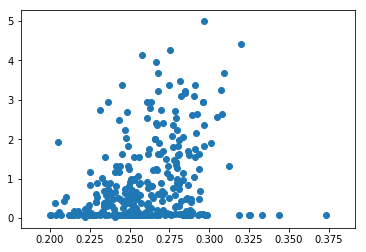

In [146]:
## Remove players below Mendoza line

batters_only_df = batters_only_df[batters_only_df['BA'] > 0.2]

plt.scatter(batters_only_df['BA'], batters_only_df['Adj_Salary'])

In [147]:
#sns.pairplot(batters_only_df, size=1.2, aspect=1.5)

In [148]:
batters_only_df.loc[:,'rootSB'] = batters_only_df.loc[:,'SB'] ** 0.5

In [149]:
X2=patsy.dmatrix('Team',data=batters_only_df,return_type='dataframe')
X2.head()

,Intercept,Team[T.ATL],Team[T.BAL],Team[T.BOS],Team[T.CHC],Team[T.CHW],Team[T.CIN],Team[T.CLE],Team[T.COL],Team[T.DET],...,Team[T.PIT],Team[T.SDP],Team[T.SEA],Team[T.SFG],Team[T.STL],Team[T.TBR],Team[T.TEX],Team[T.TOR],Team[T.TOT],Team[T.WSN]
Player_Name,,,,,,,,,,,,,,,,,,,,,
A.J. Ellis,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A.J. Pollock,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Aaron Hicks,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Aaron Judge,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Abraham Almonte,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [150]:
batters_only_df=batters_only_df.join(X2)

In [151]:
batters_only_df['LAA'] = batters_only_df['Team[T.LAA]']
batters_only_df['LAD'] = batters_only_df['Team[T.LAD]']
batters_only_df['PIT'] = batters_only_df['Team[T.PIT]']
batters_only_df['SDP'] = batters_only_df['Team[T.SDP]']
batters_only_df['STL'] = batters_only_df['Team[T.STL]']
batters_only_df['TBR'] = batters_only_df['Team[T.TBR]']
batters_only_df['TOR'] = batters_only_df['Team[T.TOR]']
batters_only_df['WSN'] = batters_only_df['Team[T.WSN]']
batters_only_df['SFG'] = batters_only_df['Team[T.SFG]']
batters_only_df['DET'] = batters_only_df['Team[T.DET]']
batters_only_df['NYM'] = batters_only_df['Team[T.NYM]']
batters_only_df['MIA'] = batters_only_df['Team[T.MIA]']


batters_only_df = batters_only_df.drop(['Team[T.LAA]','Team[T.LAD]','Team[T.PIT]',
                                        'Team[T.SDP]','Team[T.STL]','Team[T.TBR]',
                                        'Team[T.TOR]','Team[T.WSN]','Team[T.SFG]',
                                        'Team[T.DET]','Team[T.NYM]','Team[T.MIA]'],1)

In [152]:
batters_only_df['ATL'] = batters_only_df['Team[T.ATL]']
batters_only_df['BAL'] = batters_only_df['Team[T.BAL]']
batters_only_df['BOS'] = batters_only_df['Team[T.BOS]']
batters_only_df['CHC'] = batters_only_df['Team[T.CHC]']
batters_only_df['CHW'] = batters_only_df['Team[T.CHW]']
batters_only_df['CIN'] = batters_only_df['Team[T.CIN]']
batters_only_df['CLE'] = batters_only_df['Team[T.CLE]']
batters_only_df['COL'] = batters_only_df['Team[T.COL]']
batters_only_df['HOU'] = batters_only_df['Team[T.HOU]']
batters_only_df['KCR'] = batters_only_df['Team[T.KCR]']
batters_only_df['MIL'] = batters_only_df['Team[T.MIL]']
batters_only_df['MIN'] = batters_only_df['Team[T.MIN]']
batters_only_df['NYY'] = batters_only_df['Team[T.NYY]']
batters_only_df['OAK'] = batters_only_df['Team[T.OAK]']
batters_only_df['PHI'] = batters_only_df['Team[T.PHI]']
batters_only_df['SEA'] = batters_only_df['Team[T.SEA]']
batters_only_df['TEX'] = batters_only_df['Team[T.TEX]']
batters_only_df['TOT'] = batters_only_df['Team[T.TOT]']


batters_only_df = batters_only_df.drop(['Team[T.ATL]','Team[T.BAL]','Team[T.BOS]',
                                        'Team[T.CHC]','Team[T.CHW]','Team[T.CIN]',
                                        'Team[T.CLE]','Team[T.COL]','Team[T.HOU]',
                                        'Team[T.KCR]','Team[T.MIL]','Team[T.MIN]',
                                        'Team[T.NYY]','Team[T.OAK]','Team[T.PHI]',
                                        'Team[T.SEA]','Team[T.TEX]','Team[T.TOT]',
                                        'Team', 'Intercept'],1)

In [153]:
batters_only_df.corr()

,Runs,Hits,Doubles,Triples,HR,RBI,BA,OBP,SLG,OPS,...,HOU,KCR,MIL,MIN,NYY,OAK,PHI,SEA,TEX,TOT
Runs,1.000000,0.951818,0.922024,0.517588,0.792770,0.901230,0.376288,0.452948,0.370549,0.446525,...,0.003472,-0.009465,0.049178,0.002593,0.003829,-0.057034,-0.032253,0.042079,0.063506,-0.027288
Hits,0.951818,1.000000,0.953368,0.500512,0.711679,0.892723,0.450594,0.400725,0.311166,0.382294,...,-0.003339,0.029278,0.048629,-0.014645,-0.026465,-0.058913,-0.042535,0.052594,0.049497,-0.018696
Doubles,0.922024,0.953368,1.000000,0.419600,0.726092,0.891714,0.410369,0.395155,0.354240,0.413250,...,-0.003251,0.038019,0.046876,-0.003460,-0.028420,-0.013944,-0.050559,0.010990,0.012452,-0.032556
Triples,0.517588,0.500512,0.419600,1.000000,0.145692,0.273832,0.262347,0.123932,0.046395,0.080095,...,-0.055918,0.016560,0.046921,0.037148,0.003681,-0.060281,-0.025685,0.005206,0.028310,0.041120
HR,0.792770,0.711679,0.726092,0.145692,1.000000,0.922179,0.207268,0.349888,0.591281,0.578346,...,0.033043,-0.028947,0.026607,0.004004,0.043022,-0.009988,-0.024402,0.025238,0.012570,-0.071819
RBI,0.901230,0.892723,0.891714,0.273832,0.922179,1.000000,0.338994,0.408280,0.488265,0.520529,...,0.012805,-0.003076,0.028631,-0.003248,0.005065,-0.025914,-0.033818,0.013608,0.032992,-0.061931
BA,0.376288,0.450594,0.410369,0.262347,0.207268,0.338994,1.000000,0.657091,0.575875,0.677096,...,-0.011112,-0.033287,0.059819,-0.066460,-0.040188,-0.062668,-0.049261,-0.033929,-0.047119,-0.068192
OBP,0.452948,0.400725,0.395155,0.123932,0.349888,0.408280,0.657091,1.000000,0.517543,0.755846,...,-0.027979,-0.087637,0.030301,-0.024612,0.009385,-0.039563,0.068715,-0.052537,-0.031391,-0.036617
SLG,0.370549,0.311166,0.354240,0.046395,0.591281,0.488265,0.575875,0.517543,1.000000,0.951424,...,0.041537,-0.039933,0.007153,-0.032162,0.047685,0.002491,-0.032842,-0.072608,-0.037458,-0.094046
OPS,0.446525,0.382294,0.413250,0.080095,0.578346,0.520529,0.677096,0.755846,0.951424,1.000000,...,0.021716,-0.062090,0.016377,-0.033466,0.039865,-0.012329,-0.000406,-0.074464,-0.039958,-0.085140


In [154]:
## NORMALIZE NON-CATEGORICAL VALUES

In [155]:
#no_categorical = batters_only_df[['Runs', 'Hits', 'Doubles', 'Triples', 'HR', 'RBI',
#                                  'BA', 'OBP', 'SLG', 'OPS', 'SB', 'TB', 'SF', 'Adj_Salary',
#                                  'Age', 'Total_games_played', 'dWAR', 'All_star_count', 'log_salary']]

In [156]:
#from sklearn import preprocessing
#normalized_categorical = preprocessing.normalize(no_categorical, axis=0)

In [157]:
#normalized_categorical=pd.DataFrame(normalized_categorical,columns=no_categorical.columns)

In [158]:
#no_categorical.reset_index(inplace=True)

In [159]:
#normalized_categorical['Player_Name'] = no_categorical['Player_Name']

In [160]:
## NO ARIZONA FOR NOW

#categorical_data = batters_only_df[['Catcher','First_Base','Second_Base','Third_Base','Shortstop',
#                                    'Left_Field', 'Right_Field','Center_Field','DH','LAA', 'LAD',
#                                    'PIT', 'SDP', 'STL', 'TBR','TOR','WSN','SFG','DET','NYM','MIA',
#                                    'ATL', 'BAL', 'BOS', 'CHC', 'CHW', 'CIN', 'CLE', 'COL','HOU',
#                                    'KCR', 'MIL', 'MIN', 'NYY', 'OAK','PHI','SEA','TEX','TOT']]

In [161]:
#categorical_data.reset_index(inplace=True)

In [162]:
#norm_batters = pd.merge(normalized_categorical, categorical_data)

In [163]:
#norm_batters = norm_batters.set_index('Player_Name')

In [164]:
#salary_df = norm_batters.sort_values(by='Adj_Salary', ascending=False)
#salary_df[:10]['Adj_Salary']

In [165]:
#norm_batters.columns

In [166]:
## SET UP FINAL TRAIN/TEST

y = batters_only_df.log_salary
X = batters_only_df.drop(['log_salary','Adj_Salary'],1)
X_train, X_FINALTEST, y_train, y_FINALTEST = train_test_split(X, y)

In [167]:
training_df = X_train.copy(deep=True)

In [168]:
training_df

,Runs,Hits,Doubles,Triples,HR,RBI,BA,OBP,SLG,OPS,...,HOU,KCR,MIL,MIN,NYY,OAK,PHI,SEA,TEX,TOT
Player_Name,,,,,,,,,,,,,,,,,,,,,
Addison Russell,59.666667,108.000000,25.000000,2.333333,15.333333,64.000000,0.239612,0.310493,0.408077,0.718570,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Brandon Nimmo,19.000000,33.000000,6.000000,0.500000,3.000000,13.500000,0.266930,0.358002,0.373423,0.731425,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Jose Peraza,26.000000,69.333333,6.000000,2.333333,2.666667,21.000000,0.254732,0.299550,0.351135,0.650685,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Mikie Mahtook,29.333333,54.333333,9.666667,2.333333,8.000000,22.666667,0.255232,0.303821,0.455945,0.759766,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A.J. Ellis,24.000000,56.285714,9.857143,0.428571,6.142857,28.142857,0.233300,0.336991,0.354413,0.691404,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Ian Kinsler,101.714286,165.428571,33.714286,4.142857,20.285714,74.428571,0.269097,0.333492,0.436634,0.770126,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Wilson Ramos,34.000000,86.571429,13.142857,0.142857,13.285714,50.142857,0.266742,0.313662,0.430342,0.744003,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Victor Martinez,62.166667,152.666667,27.833333,0.000000,17.666667,81.000000,0.292577,0.353225,0.446522,0.799746,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Wilmer Difo,20.666667,36.000000,4.333333,1.333333,2.000000,9.333333,0.242922,0.288300,0.310537,0.598836,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [169]:
training_df.describe()

,Runs,Hits,Doubles,Triples,HR,RBI,BA,OBP,SLG,OPS,...,HOU,KCR,MIL,MIN,NYY,OAK,PHI,SEA,TEX,TOT
count,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,...,236.00000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000
mean,44.145854,86.154964,17.185432,2.025545,10.918351,41.178925,0.260534,0.324169,0.419972,0.744140,...,0.04661,0.029661,0.025424,0.042373,0.029661,0.025424,0.025424,0.012712,0.021186,0.021186
std,23.862446,43.580794,9.086635,1.673206,7.944223,23.663620,0.027005,0.033330,0.070092,0.091395,...,0.21125,0.170011,0.157743,0.201867,0.170011,0.157743,0.157743,0.112266,0.144312,0.144312
min,1.000000,3.500000,0.000000,0.000000,0.000000,1.250000,0.200174,0.233271,0.285281,0.528143,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.875000,51.166667,9.809524,0.650000,4.437500,22.666667,0.243277,0.304172,0.369847,0.682054,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,41.535714,86.485714,17.000000,1.585714,9.366667,39.500000,0.260683,0.322790,0.415888,0.742369,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,62.312500,121.934524,24.214286,3.148810,15.785714,57.142857,0.279162,0.345481,0.456537,0.788971,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,106.333333,178.571429,38.714286,8.142857,39.000000,104.857143,0.373162,0.454545,0.779729,1.232323,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [170]:
training_df.columns

Index(['Runs', 'Hits', 'Doubles', 'Triples', 'HR', 'RBI', 'BA', 'OBP', 'SLG',
       'OPS', 'SB', 'TB', 'SF', 'Age', 'Total_games_played', 'dWAR',
       'All_star_count', 'Catcher', 'First_Base', 'Second_Base', 'Third_Base',
       'Shortstop', 'Left_Field', 'Center_Field', 'Right_Field', 'DH',
       'rootASC', 'rootSB', 'LAA', 'LAD', 'PIT', 'SDP', 'STL', 'TBR', 'TOR',
       'WSN', 'SFG', 'DET', 'NYM', 'MIA', 'ATL', 'BAL', 'BOS', 'CHC', 'CHW',
       'CIN', 'CLE', 'COL', 'HOU', 'KCR', 'MIL', 'MIN', 'NYY', 'OAK', 'PHI',
       'SEA', 'TEX', 'TOT'],
      dtype='object')

In [171]:
y_train = pd.DataFrame(y_train)

In [172]:
y_train.reset_index(inplace=True)

y_train

,Player_Name,log_salary
0,Addison Russell,-0.754782
1,Brandon Nimmo,-2.504977
2,Jose Peraza,-2.480051
3,Mikie Mahtook,-2.497037
4,A.J. Ellis,-1.694789
5,Ian Kinsler,0.479963
6,Wilson Ramos,0.222134
7,Victor Martinez,0.972439
8,Wilmer Difo,-2.501508
9,Tommy Pham,-2.479876


In [198]:
## CREATE FULL TRAINING DATASET

training_df.reset_index(inplace=True)

training_df = pd.merge(training_df, y_train)

training_df = training_df.set_index('Player_Name')

In [279]:
training_df

,index,Runs,Hits,Doubles,Triples,HR,RBI,BA,OBP,SLG,...,KCR,MIL,MIN,NYY,OAK,PHI,SEA,TEX,TOT,log_salary
Player_Name,,,,,,,,,,,,,,,,,,,,,
Addison Russell,0,59.666667,108.000000,25.000000,2.333333,15.333333,64.000000,0.239612,0.310493,0.408077,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.754782
Brandon Nimmo,1,19.000000,33.000000,6.000000,0.500000,3.000000,13.500000,0.266930,0.358002,0.373423,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.504977
Jose Peraza,2,26.000000,69.333333,6.000000,2.333333,2.666667,21.000000,0.254732,0.299550,0.351135,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.480051
Mikie Mahtook,3,29.333333,54.333333,9.666667,2.333333,8.000000,22.666667,0.255232,0.303821,0.455945,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.497037
A.J. Ellis,4,24.000000,56.285714,9.857143,0.428571,6.142857,28.142857,0.233300,0.336991,0.354413,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.694789
Ian Kinsler,5,101.714286,165.428571,33.714286,4.142857,20.285714,74.428571,0.269097,0.333492,0.436634,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.479963
Wilson Ramos,6,34.000000,86.571429,13.142857,0.142857,13.285714,50.142857,0.266742,0.313662,0.430342,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.222134
Victor Martinez,7,62.166667,152.666667,27.833333,0.000000,17.666667,81.000000,0.292577,0.353225,0.446522,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.972439
Wilmer Difo,8,20.666667,36.000000,4.333333,1.333333,2.000000,9.333333,0.242922,0.288300,0.310537,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.501508


In [240]:
residuals_df = training_df[['log_salary', 'OPS', 'RBI', 'SB','TB','Age','Total_games_played','dWAR',
                       'Catcher','First_Base','Second_Base','Third_Base','Shortstop','Left_Field',
                       'Center_Field','Right_Field','Center_Field','DH','rootASC']]

In [312]:
y, X = patsy.dmatrices('log_salary ~ Runs + Hits + Doubles + Triples + HR + RBI + BA + OBP +'
                       'SLG + OPS + SB + TB + SF + Age + Total_games_played + All_star_count + dWAR +'
                       'Catcher + First_Base + Second_Base + Third_Base + Shortstop + Left_Field +'
                       'Center_Field + Right_Field + Center_Field + DH + LAA + LAD + PIT + SDP + STL +'
                       'TBR + TOR + WSN + SFG + DET + NYM + MIA + ATL + BAL + BOS + CHC + CHW + CIN +'
                       'CLE + COL + HOU + KCR + MIL + MIN + NYY + OAK + PHI + SEA + TEX + TOT',
                       data=training_df, return_type="dataframe")

model2 = sm.OLS(y, X)
fit2 = model2.fit()
fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             log_salary   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     13.69
Date:                Tue, 17 Jul 2018   Prob (F-statistic):           3.82e-41
Time:                        14:37:35   Log-Likelihood:                -216.88
No. Observations:                 236   AIC:                             541.8
Df Residuals:                     182   BIC:                             728.8
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -3.2445      0.755     -4.297      0.000      -4.734      -1.755
Runs                  -0.0061      0.013     -0.460      0.646      -0.032       0.020
Hits                   0.0047      0.012      0.404      0.686      -0.018       0.028
Doubles               -0.0064      0.021     -0.309      0.758      -0.047       0.034
Triples                0.0051      0.037      0.137      0.891      -0.068       0.078
HR                   5.07e-05      0.021      0.002      0.998      -0.042       0.042
RBI                   -0.0165      0.015     -1.130      0.260      -0.045       0.012
BA                    -0.2732      4.162     -0.066      0.948      -8.485       7.939
OBP                    0.8329      1.757      0.474      0.636      -2.633       4.299
SLG                   -0.3902      1.303     -0.300      0.765      -2.960       2.180
OPS                    0.4427      0.942      0.470      0.639      -1.415       2.301
SB                    -0.0099      0.012     -0.858      0.392      -0.033       0.013
TB                     0.0087      0.010      0.911      0.363      -0.010       0.027
SF                    -0.0279      0.062     -0.451      0.653      -0.150       0.094
Age                    0.0188      0.024      0.782      0.435      -0.029       0.066
Total_games_played     0.0027      0.000      6.778      0.000       0.002       0.004
All_star_count         0.0751      0.059      1.282      0.201      -0.040       0.191
dWAR                   0.0966      0.091      1.058      0.291      -0.084       0.277
Catcher               -0.2435      0.176     -1.383      0.169      -0.591       0.104
First_Base            -0.2505      0.179     -1.401      0.163      -0.603       0.102
Second_Base           -0.6185      0.166     -3.726      0.000      -0.946      -0.291
Third_Base            -0.3594      0.162     -2.213      0.028      -0.680      -0.039
Shortstop             -0.6243      0.158     -3.949      0.000      -0.936      -0.312
Left_Field            -0.5122      0.155     -3.308      0.001      -0.818      -0.207
Center_Field          -0.4752      0.174     -2.725      0.007      -0.819      -0.131
Right_Field           -0.1603      0.152     -1.053      0.294      -0.461       0.140
DH                    -0.0007      0.280     -0.002      0.998      -0.553       0.552
LAA                    0.2422      0.402      0.602      0.548      -0.551       1.036
LAD                    0.1051      0.330      0.319      0.750      -0.546       0.756
PIT                    0.1289      0.312      0.413      0.680      -0.488       0.745
SDP                   -0.1300      0.366     -0.355      0.723      -0.852       0.592
STL                   -0.0324      0.319     -0.102      0.919      -0.662       0.597
TBR                   -0.0067      0.3

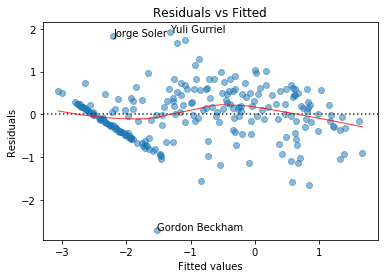

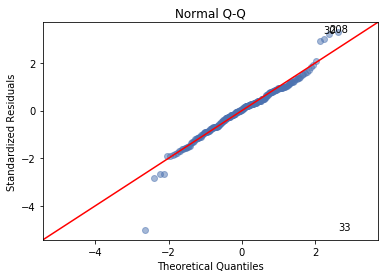

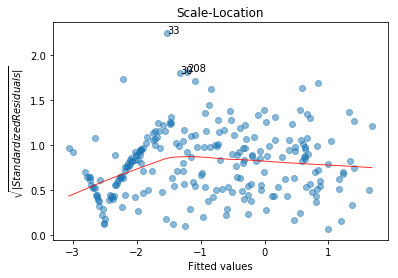

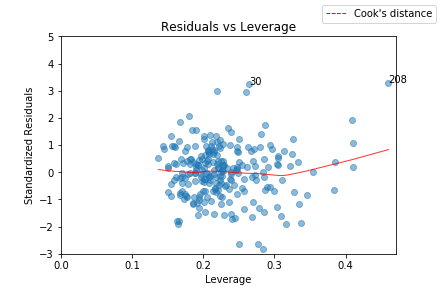

In [313]:
diagnostic_plots.diagnostic_plots(training_df.drop(
    'log_salary', axis=1), training_df['log_salary'], fit2)

In [314]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

reg2 = LinearRegression()
scores = cross_val_score(reg, X_train, y_train, cv=10, scoring='r2')
mse_scores = cross_val_score(reg, X_train, y_train, cv=10, scoring='neg_mean_squared_error')

# Read in the pickle file
print(np.mean(scores))
print(-np.mean(mse_scores))

0.4943952023628725
0.938156744111947


     test_score  train_score  train_size
0 -8.084894e-01     1.000000          12
1 -4.529976e-01     1.000000          39
2 -3.185036e+15     0.528005          67
3 -1.362355e+00     0.119340          95
4 -2.216422e+00    -1.701659         123


(-1, 1)

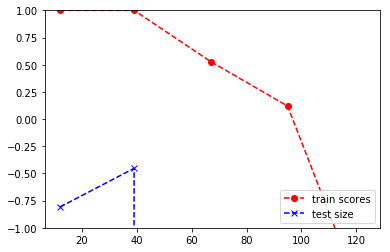

In [315]:
train_sizes, train_scores, test_scores = learning_curve(reg2, X_train, y_train, cv=4)
ave_train_scores = train_scores.mean(axis=1)
ave_test_scores = test_scores.mean(axis=1)

learn_df2 = pd.DataFrame({
    'train_size': train_sizes,
    'train_score': ave_train_scores,
    'test_score': ave_test_scores
})
print(learn_df2)

plt.plot(learn_df2['train_size'], learn_df2['train_score'], 'r--o', label='train scores')
plt.plot(learn_df2['train_size'], learn_df2['test_score'], 'b--x', label='test size')
plt.legend(loc='lower right')
plt.ylim(-1,1)

Fit2, original model with all features against log_salary has mean R^2 value of 0.538 over 10 cross folds,
and a mean MSE score of 0.777 over 10 cross folds.

In [316]:
y, X = patsy.dmatrices('log_salary ~ Hits + Doubles + Triples + HR + RBI + OBP +'
                       'SLG + OPS + SB + TB + SF + Age + Total_games_played + All_star_count + dWAR +'
                       'Catcher + First_Base + Second_Base + Third_Base + Shortstop + Left_Field +'
                       'Center_Field + Right_Field + Center_Field + DH + LAA + LAD + PIT + SDP + STL +'
                       'TBR + TOR + WSN + SFG + DET + NYM + MIA + ATL + BAL + BOS + CHC + CHW + CIN +'
                       'CLE + COL + HOU + KCR + MIL + MIN + NYY + OAK + PHI + SEA + TEX + TOT + rootASC',
                       data=training_df, return_type="dataframe")

model3 = sm.OLS(y, X)
fit3 = model3.fit()
fit3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             log_salary   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     14.68
Date:                Tue, 17 Jul 2018   Prob (F-statistic):           4.57e-43
Time:                        14:37:37   Log-Likelihood:                -212.61
No. Observations:                 236   AIC:                             531.2
Df Residuals:                     183   BIC:                             714.8
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -3.0136      0.694     -4.343      0.000      -4.383      -1.644
Hits                   0.0049      0.010      0.495      0.621      -0.015       0.024
Doubles               -0.0040      0.020     -0.201      0.841      -0.043       0.035
Triples                0.0023      0.036      0.063      0.950      -0.069       0.073
HR                  9.036e-05      0.021      0.004      0.997      -0.041       0.041
RBI                   -0.0169      0.014     -1.199      0.232      -0.045       0.011
OBP                    0.3892      1.456      0.267      0.790      -2.484       3.263
SLG                   -0.0902      1.132     -0.080      0.937      -2.323       2.143
OPS                    0.2990      0.552      0.542      0.589      -0.790       1.388
SB                    -0.0120      0.010     -1.201      0.231      -0.032       0.008
TB                     0.0057      0.007      0.796      0.427      -0.008       0.020
SF                    -0.0186      0.060     -0.308      0.759      -0.138       0.101
Age                    0.0120      0.023      0.517      0.605      -0.034       0.058
Total_games_played     0.0027      0.000      7.099      0.000       0.002       0.003
All_star_count        -0.1990      0.118     -1.689      0.093      -0.432       0.033
dWAR                   0.1029      0.089      1.153      0.250      -0.073       0.279
Catcher               -0.2099      0.168     -1.246      0.214      -0.542       0.122
First_Base            -0.2025      0.172     -1.179      0.240      -0.542       0.137
Second_Base           -0.6175      0.158     -3.911      0.000      -0.929      -0.306
Third_Base            -0.3418      0.156     -2.194      0.030      -0.649      -0.034
Shortstop             -0.6234      0.153     -4.081      0.000      -0.925      -0.322
Left_Field            -0.5118      0.150     -3.407      0.001      -0.808      -0.215
Center_Field          -0.4633      0.170     -2.722      0.007      -0.799      -0.127
Right_Field           -0.1381      0.145     -0.951      0.343      -0.425       0.148
DH                     0.0947      0.265      0.358      0.721      -0.427       0.617
LAA                    0.3313      0.393      0.843      0.400      -0.444       1.107
LAD                    0.0354      0.324      0.109      0.913      -0.603       0.674
PIT                    0.1464      0.305      0.480      0.632      -0.456       0.748
SDP                   -0.1571      0.359     -0.438      0.662      -0.865       0.550
STL                    0.0215      0.313      0.069      0.945      -0.596       0.639
TBR                    0.0062      0.379      0.016      0.987      -0.742       0.755
TOR                   -0.0077      0.338     -0.023      0.982      -0.674       0.659
WSN                    0.1321      0.3

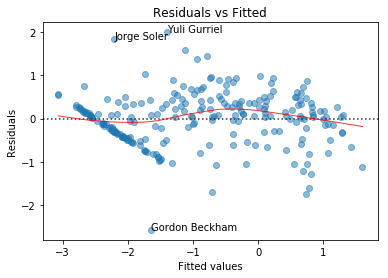

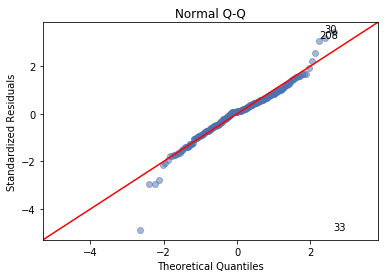

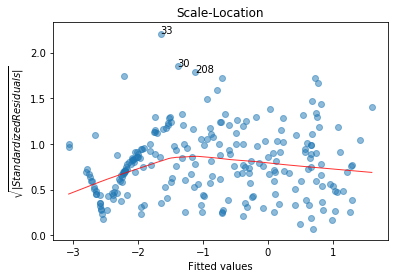

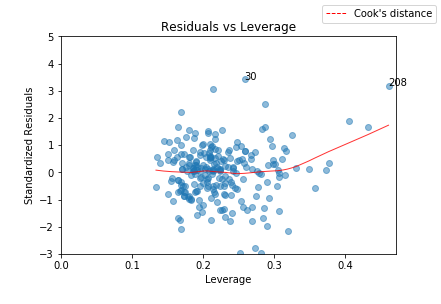

In [317]:
diagnostic_plots.diagnostic_plots(training_df.drop(
    'log_salary', axis=1), training_df['log_salary'], fit3)

In [318]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

reg3 = LinearRegression()
scores = cross_val_score(reg, X_train, y_train, cv=10, scoring='r2')
mse_scores = cross_val_score(reg, X_train, y_train, cv=10, scoring='neg_mean_squared_error')

# Read in the pickle file
print(np.mean(scores))
print(-np.mean(mse_scores))

0.47448232248755834
0.9299386763074601


     test_score  train_score  train_size
0  5.621514e-01     1.000000          12
1 -1.043425e+00     1.000000          39
2 -3.330314e+12     0.689416          67
3 -3.142850e-01     0.755088          95
4  3.303413e-01     0.850865         123


(-1, 1)

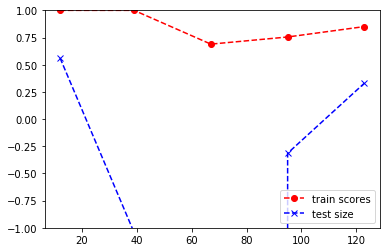

In [319]:
train_sizes, train_scores, test_scores = learning_curve(reg3, X_train, y_train, cv=4)
ave_train_scores = train_scores.mean(axis=1)
ave_test_scores = test_scores.mean(axis=1)

learn_df = pd.DataFrame({
    'train_size': train_sizes,
    'train_score': ave_train_scores,
    'test_score': ave_test_scores
})
print(learn_df)

plt.plot(learn_df['train_size'], learn_df['train_score'], 'r--o', label='train scores')
plt.plot(learn_df['train_size'], learn_df['test_score'], 'b--x', label='test size')
plt.legend(loc='lower right')
plt.ylim(-1,1)

Fit3, has mean R^2 value of 0.543 over 10 cross folds, and a mean MSE score of 0.717 over 10 cross folds.

In [320]:
y, X = patsy.dmatrices('log_salary ~ Hits + Doubles + RBI + OBP +'
                       'OPS + SB + TB + SF + Age + Total_games_played + All_star_count + dWAR +'
                       'Catcher + First_Base + Second_Base + Third_Base + Shortstop + Left_Field +'
                       'Center_Field + Right_Field + Center_Field + DH + LAA + LAD + PIT + SDP + STL +'
                       'TBR + TOR + WSN + SFG + DET + NYM + MIA + ATL + BOS + CHC + CHW + CIN +'
                       'COL + HOU + KCR + MIL + MIN + NYY + OAK + PHI + TEX + TOT + rootASC',
                       data=training_df, return_type="dataframe")

model4 = sm.OLS(y, X)
fit4 = model4.fit()
fit4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             log_salary   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     15.73
Date:                Tue, 17 Jul 2018   Prob (F-statistic):           1.86e-44
Time:                        14:37:38   Log-Likelihood:                -215.73
No. Observations:                 236   AIC:                             529.5
Df Residuals:                     187   BIC:                             699.2
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -3.2248      0.679     -4.750      0.000      -4.564      -1.886
Hits                   0.0044      0.008      0.519      0.604      -0.012       0.021
Doubles            -4.955e-05      0.021     -0.002      0.998      -0.041       0.041
RBI                   -0.0157      0.012     -1.259      0.210      -0.040       0.009
OBP                    0.6572      2.517      0.261      0.794      -4.309       5.623
OPS                    0.2176      1.001      0.217      0.828      -1.757       2.192
SB                    -0.0127      0.009     -1.357      0.176      -0.031       0.006
TB                     0.0052      0.008      0.692      0.490      -0.010       0.020
SF                    -0.0112      0.059     -0.189      0.850      -0.128       0.105
Age                    0.0145      0.023      0.625      0.533      -0.031       0.060
Total_games_played     0.0026      0.000      6.957      0.000       0.002       0.003
All_star_count        -0.1895      0.117     -1.618      0.107      -0.421       0.042
dWAR                   0.1060      0.089      1.188      0.236      -0.070       0.282
Catcher               -0.2320      0.168     -1.379      0.169      -0.564       0.100
First_Base            -0.2266      0.172     -1.320      0.188      -0.565       0.112
Second_Base           -0.6949      0.154     -4.515      0.000      -0.999      -0.391
Third_Base            -0.3981      0.153     -2.594      0.010      -0.701      -0.095
Shortstop             -0.6341      0.151     -4.198      0.000      -0.932      -0.336
Left_Field            -0.5226      0.147     -3.544      0.000      -0.813      -0.232
Center_Field          -0.4541      0.170     -2.672      0.008      -0.789      -0.119
Right_Field           -0.1336      0.142     -0.938      0.349      -0.415       0.147
DH                     0.0712      0.264      0.270      0.788      -0.449       0.592
LAA                    0.4631      0.345      1.342      0.181      -0.218       1.144
LAD                    0.1610      0.271      0.594      0.553      -0.374       0.696
PIT                    0.2852      0.251      1.136      0.257      -0.210       0.781
SDP                   -0.0215      0.305     -0.070      0.944      -0.624       0.581
STL                    0.1394      0.256      0.545      0.586      -0.365       0.644
TBR                    0.1396      0.334      0.418      0.677      -0.520       0.799
TOR                    0.1148      0.279      0.411      0.681      -0.436       0.666
WSN                    0.2594      0.290      0.894      0.372      -0.313       0.831
SFG                    0.2393      0.262      0.913      0.363      -0.278       0.757
DET                    0.2040      0.277      0.737      0.462      -0.342       0.750
NYM                    0.0519      0.2

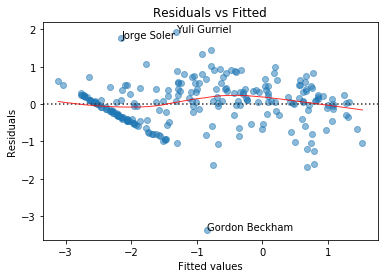

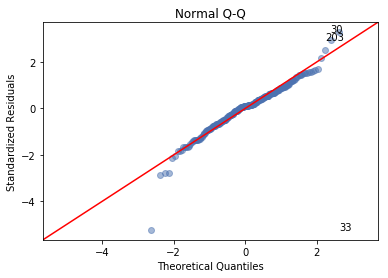

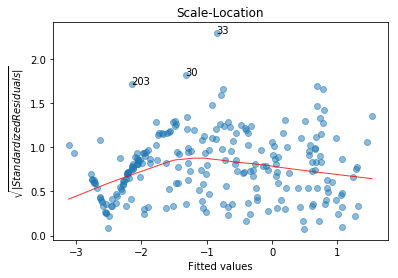

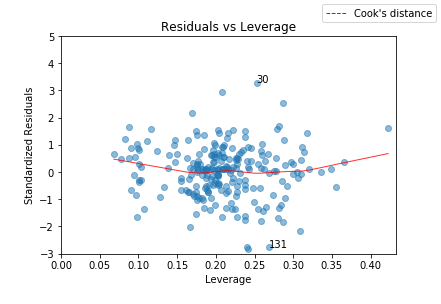

In [321]:
diagnostic_plots.diagnostic_plots(training_df.drop(
    'log_salary', axis=1), training_df['log_salary'], fit4)

In [322]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

reg4 = LinearRegression()
scores = cross_val_score(reg4, X_train, y_train, cv=10, scoring='r2')
mse_scores = cross_val_score(reg, X_train, y_train, cv=10, scoring='neg_mean_squared_error')

# Read in the pickle file
print(np.mean(scores))
print(-np.mean(mse_scores))

0.42720475875196673
0.9088120638005158


   test_score  train_score  train_size
0    0.235414     1.000000          12
1   -2.073868     1.000000          39
2   -0.252270     0.907999          67
3    0.282653     0.810050          95
4    0.432488     0.755258         123


(-1, 1)

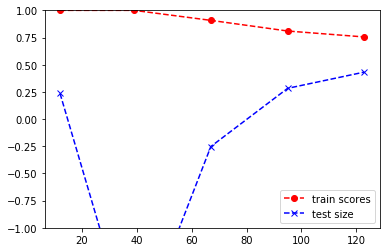

In [323]:
train_sizes, train_scores, test_scores = learning_curve(reg4, X_train, y_train, cv=4)
ave_train_scores = train_scores.mean(axis=1)
ave_test_scores = test_scores.mean(axis=1)

learn_df = pd.DataFrame({
    'train_size': train_sizes,
    'train_score': ave_train_scores,
    'test_score': ave_test_scores
})
print(learn_df)

plt.plot(learn_df['train_size'], learn_df['train_score'], 'r--o', label='train scores')
plt.plot(learn_df['train_size'], learn_df['test_score'], 'b--x', label='test size')
plt.legend(loc='lower right')
plt.ylim(-1,1)

Fit4, has mean R^2 value of 0.653 over 10 cross folds, and a mean MSE score of 0.600 over 10 cross folds.

In [332]:
y, X = patsy.dmatrices('log_salary ~ OPS + RBI + '
                       'SB + TB + Age + Total_games_played + dWAR +'
                       'Catcher + First_Base + Second_Base + Third_Base + Shortstop + Left_Field +'
                       'Center_Field + Right_Field + Center_Field + DH + rootASC',
                       data=training_df, return_type="dataframe")

model5 = sm.OLS(y, X)
fit5 = model5.fit()
fit5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             log_salary   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     48.20
Date:                Tue, 17 Jul 2018   Prob (F-statistic):           1.50e-62
Time:                        14:42:11   Log-Likelihood:                -228.46
No. Observations:                 236   AIC:                             490.9
Df Residuals:                     219   BIC:                             549.8
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -3.2655      0.595     -5.492      0.000      -4.438      -2.094
OPS                    0.3269      0.607      0.539      0.591      -0.869       1.523
RBI                   -0.0222      0.009     -2.456      0.015      -0.040      -0.004
SB                    -0.0102      0.008     -1.224      0.222      -0.027       0.006
TB                     0.0098      0.003      3.128      0.002       0.004       0.016
Age                    0.0263      0.021      1.257      0.210      -0.015       0.068
Total_games_played     0.0026      0.000      7.476      0.000       0.002       0.003
dWAR                   0.0987      0.079      1.244      0.215      -0.058       0.255
Catcher               -0.2575      0.152     -1.693      0.092      -0.557       0.042
First_Base            -0.1862      0.159     -1.173      0.242      -0.499       0.127
Second_Base           -0.6818      0.140     -4.866      0.000      -0.958      -0.406
Third_Base            -0.4278      0.141     -3.036      0.003      -0.705      -0.150
Shortstop             -0.6055      0.138     -4.388      0.000      -0.877      -0.334
Left_Field            -0.5481      0.137     -4.001      0.000      -0.818      -0.278
Center_Field          -0.5036      0.158     -3.188      0.002      -0.815      -0.192
Right_Field           -0.1539      0.133     -1.160      0.247      -0.415       0.108
DH                     0.0989      0.230      0.429      0.668      -0.355       0.553
rootASC                0.2194      0.098      2.236      0.026       0.026       0.413
==============================================================================
Omnibus:                       45.905   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              168.639
Skew:                          -0.736   Prob(JB):                     2.40e-37
Kurtosis:                       6.871   Cond. No.                     8.23e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.28e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

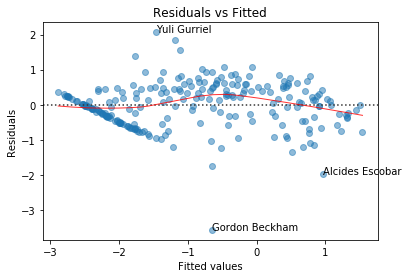

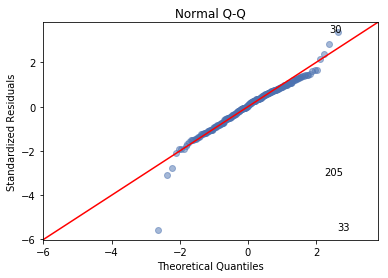

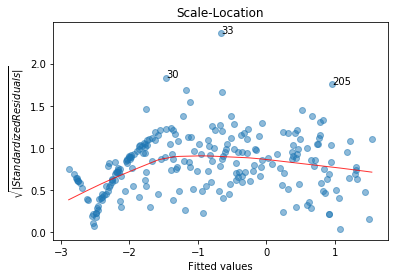

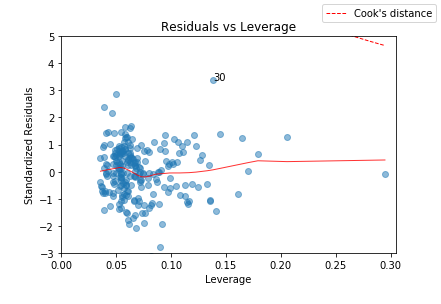

In [333]:
diagnostic_plots.diagnostic_plots(training_df.drop(
    'log_salary', axis=1), training_df['log_salary'], fit5)

In [334]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

reg5 = LinearRegression()
scores = cross_val_score(reg, X_train, y_train, cv=10, scoring='r2')
mse_scores = cross_val_score(reg, X_train, y_train, cv=10, scoring='neg_mean_squared_error')

# Read in the pickle file
print(np.mean(scores))
print(-np.mean(mse_scores))

0.7305753983496098
0.4646300243159004


   test_score  train_score  train_size
0    0.383342     1.000000          12
1    0.712162     0.923887          39
2    0.718106     0.849162          67
3    0.732518     0.821065          95
4    0.737055     0.800777         123


(-1, 1)

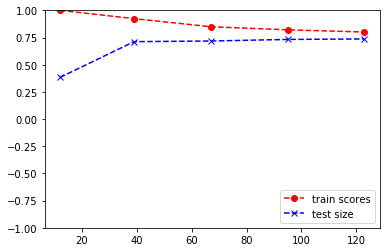

In [335]:
train_sizes, train_scores, test_scores = learning_curve(reg5, X_train, y_train, cv=4)
ave_train_scores = train_scores.mean(axis=1)
ave_test_scores = test_scores.mean(axis=1)

learn_df = pd.DataFrame({
    'train_size': train_sizes,
    'train_score': ave_train_scores,
    'test_score': ave_test_scores
})
print(learn_df)

plt.plot(learn_df['train_size'], learn_df['train_score'], 'r--o', label='train scores')
plt.plot(learn_df['train_size'], learn_df['test_score'], 'b--x', label='test size')
plt.legend(loc='lower right')
plt.ylim(-1,1)

Fit5, has mean R^2 value of 0.717 over 10 cross folds, and a mean MSE score of 0.533 over 10 cross folds.